# Programming with contraints

Explain the problem as it is defined by the rules.

The engine will compute the combination that satisfies the constraines

- Ideation: 30mn
- Design: 1h - feature out how to manage variables for board
- Implementation: 2h - generic represeentatiàno of rules

In [ ]:
## model documentation

https://pypi.org/project/python-constraint/

In [1]:
! pip install python-constraint

  Using cached python-constraint-1.4.0.tar.bz2 (18 kB)
  Created wheel for python-constraint: filename=python_constraint-1.4.0-py2.py3-none-any.whl size=24081 sha256=96416a8f002cdf378faceb42bd25631aca654c5e2566c3158457715f981c71ed
  Stored in directory: /Users/cfalguiere/Library/Caches/pip/wheels/51/36/1f/c2ccb8dc4eba38c5215636d4ae2c480b32069cab0376bcc1a4
Successfully built python-constraint


In [3]:
from constraint  import *

## Basic example from the tutorial

In [4]:
problem = Problem()
problem.addVariable("a", [1,2,3])
problem.addVariable("b", [4,5,6])
problem.getSolutions()

[{'a': 3, 'b': 6},
 {'a': 3, 'b': 5},
 {'a': 3, 'b': 4},
 {'a': 2, 'b': 6},
 {'a': 2, 'b': 5},
 {'a': 2, 'b': 4},
 {'a': 1, 'b': 6},
 {'a': 1, 'b': 5},
 {'a': 1, 'b': 4}]

Without constraints it does a cartesian product

The constraint force to filter only paris where b is twice a 

In [6]:
problem.addConstraint(lambda a, b: a*2 == b,
                          ("a", "b"))
problem.getSolutions()

[{'a': 3, 'b': 6}, {'a': 2, 'b': 4}]

## apply to the mobnogram problem

In [7]:
from boardutilsv2 import Puzzle, Board, BoardMark
from plotterutilsv2 import BoardPlotter

In [29]:
clues2x2 = {
    'rows': [1, 2],
    'cols': [2, 1]
}
puzzle2x2 = Puzzle(clues2x2)

In [30]:
# let first write some static rules
problem = Problem()

# create a variable for each cell
# name is rNcM where N is the row number and M the col number
# are all in range 0-1
problem.addVariable("r0c0", [0,1])
problem.addVariable("r0c1", [0,1])
problem.addVariable("r1c0", [0,1])
problem.addVariable("r1c1", [0,1])
problem.getSolutions()

[{'r0c0': 1, 'r0c1': 1, 'r1c0': 1, 'r1c1': 1},
 {'r0c0': 1, 'r0c1': 1, 'r1c0': 1, 'r1c1': 0},
 {'r0c0': 1, 'r0c1': 1, 'r1c0': 0, 'r1c1': 1},
 {'r0c0': 1, 'r0c1': 1, 'r1c0': 0, 'r1c1': 0},
 {'r0c0': 1, 'r0c1': 0, 'r1c0': 1, 'r1c1': 1},
 {'r0c0': 1, 'r0c1': 0, 'r1c0': 1, 'r1c1': 0},
 {'r0c0': 1, 'r0c1': 0, 'r1c0': 0, 'r1c1': 1},
 {'r0c0': 1, 'r0c1': 0, 'r1c0': 0, 'r1c1': 0},
 {'r0c0': 0, 'r0c1': 1, 'r1c0': 1, 'r1c1': 1},
 {'r0c0': 0, 'r0c1': 1, 'r1c0': 1, 'r1c1': 0},
 {'r0c0': 0, 'r0c1': 1, 'r1c0': 0, 'r1c1': 1},
 {'r0c0': 0, 'r0c1': 1, 'r1c0': 0, 'r1c1': 0},
 {'r0c0': 0, 'r0c1': 0, 'r1c0': 1, 'r1c1': 1},
 {'r0c0': 0, 'r0c1': 0, 'r1c0': 1, 'r1c1': 0},
 {'r0c0': 0, 'r0c1': 0, 'r1c0': 0, 'r1c1': 1},
 {'r0c0': 0, 'r0c1': 0, 'r1c0': 0, 'r1c1': 0}]

In [31]:
# express the clues contraints in a static way
# last parameter is the given variables. They match the lambda vars.
# contraints on rows
problem.addConstraint(lambda c1, c2: c1+c2 == 1,
                          ("r0c0", "r0c1"))
problem.addConstraint(lambda c1, c2: c1+c2 == 2,
                          ("r1c0", "r1c1"))
# contraints on cols
problem.addConstraint(lambda r1, r2: r1+r2 == 2,
                          ("r0c0", "r1c0"))
problem.addConstraint(lambda r1, r2: r1+r2 == 1,
                          ("r0c1", "r1c1"))
solutions = problem.getSolutions()
solutions

[{'r0c0': 1, 'r0c1': 0, 'r1c0': 1, 'r1c1': 1}]

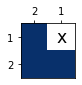

In [37]:
board2x2 = Board(puzzle2x2)
plotter2x2 = BoardPlotter(board2x2)

board2x2.states[0,0] = solutions[0]['r0c0']
board2x2.states[0,1] = solutions[0]['r0c1']
board2x2.states[1,0] = solutions[0]['r1c0']
board2x2.states[1,1] = solutions[0]['r1c1']

plotter2x2.show()
assert board2x2.is_done()

## A more generic implementation

In [38]:
clues2x2 = {
    'rows': [1, 2],
    'cols': [2, 1]
}
puzzle2x2 = Puzzle(clues2x2)

In [46]:
# let first write some static rules
problem = Problem()

# create a variable for each cell
# name is rNcM where N is the row number and M the col number
# are all in range 0-1
problem.addVariable("r0c0", [0,1])
problem.addVariable("r0c1", [0,1])
problem.addVariable("r1c0", [0,1])
problem.addVariable("r1c1", [0,1])
problem.getSolutions()

[{'r0c0': 1, 'r0c1': 1, 'r1c0': 1, 'r1c1': 1},
 {'r0c0': 1, 'r0c1': 1, 'r1c0': 1, 'r1c1': 0},
 {'r0c0': 1, 'r0c1': 1, 'r1c0': 0, 'r1c1': 1},
 {'r0c0': 1, 'r0c1': 1, 'r1c0': 0, 'r1c1': 0},
 {'r0c0': 1, 'r0c1': 0, 'r1c0': 1, 'r1c1': 1},
 {'r0c0': 1, 'r0c1': 0, 'r1c0': 1, 'r1c1': 0},
 {'r0c0': 1, 'r0c1': 0, 'r1c0': 0, 'r1c1': 1},
 {'r0c0': 1, 'r0c1': 0, 'r1c0': 0, 'r1c1': 0},
 {'r0c0': 0, 'r0c1': 1, 'r1c0': 1, 'r1c1': 1},
 {'r0c0': 0, 'r0c1': 1, 'r1c0': 1, 'r1c1': 0},
 {'r0c0': 0, 'r0c1': 1, 'r1c0': 0, 'r1c1': 1},
 {'r0c0': 0, 'r0c1': 1, 'r1c0': 0, 'r1c1': 0},
 {'r0c0': 0, 'r0c1': 0, 'r1c0': 1, 'r1c1': 1},
 {'r0c0': 0, 'r0c1': 0, 'r1c0': 1, 'r1c1': 0},
 {'r0c0': 0, 'r0c1': 0, 'r1c0': 0, 'r1c1': 1},
 {'r0c0': 0, 'r0c1': 0, 'r1c0': 0, 'r1c1': 0}]

In [47]:
# get the clues
clues_rows = puzzle2x2.norm_clues['rows']
clues_cols = puzzle2x2.norm_clues['cols']
print(clues_rows)
print(clues_cols)
# ox
# oo

[[1], [2]]
[[2], [1]]


In [44]:
clues_rows[0][0]

1

In [48]:
# express the clues contraints by the clues
# last parameter is the given variables. They match the lambda vars.
# contraints on rows
problem.addConstraint(lambda c1, c2: c1+c2 == clues_rows[0][0],
                          ("r0c0", "r0c1"))
problem.addConstraint(lambda c1, c2: c1+c2 == clues_rows[1][0],
                          ("r1c0", "r1c1"))
# constraints on cols
problem.addConstraint(lambda r1, r2: r1+r2 == clues_cols[0][0],
                          ("r0c0", "r1c0"))
problem.addConstraint(lambda r1, r2: r1+r2 == clues_cols[1][0],
                          ("r0c1", "r1c1"))
problem.getSolutions()

[{'r0c0': 1, 'r0c1': 0, 'r1c0': 1, 'r1c1': 1}]

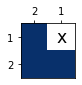

In [49]:
board2x2 = Board(puzzle2x2)
plotter2x2 = BoardPlotter(board2x2)

board2x2.states[0,0] = solutions[0]['r0c0']
board2x2.states[0,1] = solutions[0]['r0c1']
board2x2.states[1,0] = solutions[0]['r1c0']
board2x2.states[1,1] = solutions[0]['r1c1']

plotter2x2.show()
assert board2x2.is_done()

## Generic implementation for a fiven size

In [54]:
clues2x2 = {
    'rows': [1, 2],
    'cols': [2, 1]
}
puzzle2x2 = Puzzle(clues2x2)

In [55]:
# each variable is the position on the board reshaped to a list
problem = Problem()
# first parameter is the variable name
# second parameter is the range 0-1
problem.addVariables(range(puzzle2x2.cells_count), [0,1])
problem.getSolutions()

[{0: 1, 1: 1, 2: 1, 3: 1},
 {0: 1, 1: 1, 2: 1, 3: 0},
 {0: 1, 1: 1, 2: 0, 3: 1},
 {0: 1, 1: 1, 2: 0, 3: 0},
 {0: 1, 1: 0, 2: 1, 3: 1},
 {0: 1, 1: 0, 2: 1, 3: 0},
 {0: 1, 1: 0, 2: 0, 3: 1},
 {0: 1, 1: 0, 2: 0, 3: 0},
 {0: 0, 1: 1, 2: 1, 3: 1},
 {0: 0, 1: 1, 2: 1, 3: 0},
 {0: 0, 1: 1, 2: 0, 3: 1},
 {0: 0, 1: 1, 2: 0, 3: 0},
 {0: 0, 1: 0, 2: 1, 3: 1},
 {0: 0, 1: 0, 2: 1, 3: 0},
 {0: 0, 1: 0, 2: 0, 3: 1},
 {0: 0, 1: 0, 2: 0, 3: 0}]

In [56]:
# get the clues
clues_rows = puzzle2x2.norm_clues['rows']
clues_cols = puzzle2x2.norm_clues['cols']
nc = puzzle2x2.width
nr = puzzle2x2.height

In [ ]:
# {0: 1, 1: 0, 2: 1, 3: 1}
# -> {'r0c0': 1, 'r0c1': 0, 'r1c0': 1, 'r1c1': 1}

In [51]:
# cells for row 0 are at position row * 2 + col where 2 stands for the width
# 0 * 2 + 0 -> 0
# 0 * 2 + 1 -> 1
[0 * 2 + c for c in range(2)]

[0, 1]

In [52]:
# cells for col 0 are at position row + 2 * col where 2 stands for the width
# 0 * 2 + 0 -> 0
# 1 * 2 + 0 -> 2
[r * 2 + 0 for r in range(2)]

[0, 2]

In [58]:
# express the clues contraints by the clues
# last parameter is the collection of variable names that must add up 
# please note that the list consist in var names not values
# to the value given as parameter to ExactSumConstraint.
# contraints on rows
problem.addConstraint(
         ExactSumConstraint(clues_rows[0][0]),
         [0 * 2 + c for c in range(nc)])
problem.addConstraint(
         ExactSumConstraint(clues_rows[1][0]),
         [1 * 2 + c for c in range(nc)])
# contraints on cols
problem.addConstraint(
     ExactSumConstraint(clues_cols[0][0]),
     [r * 2 + 0 for r in range(nr)])
problem.addConstraint(
     ExactSumConstraint(clues_cols[1][0]),
     [r * 2 + 1 for r in range(nr)])
solutions = problem.getSolutions()
solutions

[{0: 1, 1: 0, 2: 1, 3: 1}]

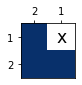

In [59]:
board2x2 = Board(puzzle2x2)
plotter2x2 = BoardPlotter(board2x2)

board2x2.states[0,0] = solutions[0][0]
board2x2.states[0,1] = solutions[0][1]
board2x2.states[1,0] = solutions[0][2]
board2x2.states[1,1] = solutions[0][3]

plotter2x2.show()
assert board2x2.is_done()

## Generic implementation

In [104]:
clues2x2 = {
    'rows': [1, 2],
    'cols': [2, 1]
}
puzzle2x2 = Puzzle(clues2x2)

In [105]:
# each variable is the position on the board reshaped to a list
problem = Problem()
# first parameter is the variable name
# second parameter is the range 0-1
problem.addVariables(range(puzzle2x2.cells_count), [0,1])
problem.getSolutions()

[{0: 1, 1: 1, 2: 1, 3: 1},
 {0: 1, 1: 1, 2: 1, 3: 0},
 {0: 1, 1: 1, 2: 0, 3: 1},
 {0: 1, 1: 1, 2: 0, 3: 0},
 {0: 1, 1: 0, 2: 1, 3: 1},
 {0: 1, 1: 0, 2: 1, 3: 0},
 {0: 1, 1: 0, 2: 0, 3: 1},
 {0: 1, 1: 0, 2: 0, 3: 0},
 {0: 0, 1: 1, 2: 1, 3: 1},
 {0: 0, 1: 1, 2: 1, 3: 0},
 {0: 0, 1: 1, 2: 0, 3: 1},
 {0: 0, 1: 1, 2: 0, 3: 0},
 {0: 0, 1: 0, 2: 1, 3: 1},
 {0: 0, 1: 0, 2: 1, 3: 0},
 {0: 0, 1: 0, 2: 0, 3: 1},
 {0: 0, 1: 0, 2: 0, 3: 0}]

In [106]:
# get the clues
clues_rows = puzzle2x2.norm_clues['rows']
clues_cols = puzzle2x2.norm_clues['cols']
nc = puzzle2x2.width
nr = puzzle2x2.height

In [69]:
clues_rows[0]

[1]

In [107]:
for row in range(nr):
    problem.addConstraint(
             ExactSumConstraint(clues_rows[row][0]),
             [row * nc + c for c in range(nc)])
for col in range(nc):
    problem.addConstraint(
         ExactSumConstraint(clues_cols[col][0]),
         [r * nc + col for r in range(nr)])

solutions = problem.getSolutions()
solutions

[{0: 1, 1: 0, 2: 1, 3: 1}]

In [84]:
list(solutions[0].values())

[1, 0, 1, 1]

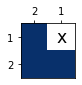

In [108]:
board2x2 = Board(puzzle2x2)
plotter2x2 = BoardPlotter(board2x2)

board2x2.states.flat[:] = list(solutions[0].values())
plotter2x2.show()
assert board2x2.is_done()

## Solver class

In [109]:
%reset -f

In [110]:
from boardutilsv2 import Puzzle, Board, BoardMark
from plotterutilsv2 import BoardPlotter

from constraint  import *

class SolverConstraints:
    
    def solve(self, some_puzzle, verbose=False):
        # each variable is the position on the board reshaped to a list
        problem = Problem()
        # first parameter is the variable name
        # second parameter is the range 0-1
        problem.addVariables(range(some_puzzle.cells_count), [0,1])

        # get the clues
        clues_rows = some_puzzle.norm_clues['rows']
        clues_cols = some_puzzle.norm_clues['cols']
        nc = some_puzzle.width
        nr = some_puzzle.height

        for row in range(nr):
            problem.addConstraint(
                     ExactSumConstraint(clues_rows[row][0]),
                     [row * nc + c for c in range(nc)])
        for col in range(nc):
            problem.addConstraint(
                 ExactSumConstraint(clues_cols[col][0]),
                 [r * nc + col for r in range(nr)])

        solutions = problem.getSolutions()
        if verbose:
            print(f"solutions={solutions}")

        board = Board(some_puzzle)
        board.states.flat[:] = list(solutions[0].values())
        return board

### test 2x2

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
solutions=[{0: 1, 1: 0, 2: 1, 3: 1}]


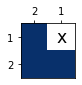

In [111]:
%time
# ox
# oo
clues2x2 = {
    'rows': [1, 2],
    'cols': [2, 1]
}
puzzle2x2 = Puzzle(clues2x2)
board2x2_solved = SolverConstraints().solve(puzzle2x2, verbose=True)
plotter2x2 = BoardPlotter(board2x2_solved)
plotter2x2.show()
assert board2x2_solved.is_done()

### test a 3x3

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs
solutions=[{0: 1, 1: 0, 2: 0, 3: 1, 4: 1, 5: 0, 6: 1, 7: 1, 8: 1}]


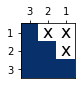

In [112]:
%time
# oxx
# oox
# ooo
clues3x3 = {
    'rows': [1, 2, 3],
    'cols': [3, 2, 1]
}
puzzle3x3 = Puzzle(clues3x3)

board3x3_solved = SolverConstraints().solve(puzzle3x3, verbose=True)
plotter3x3 = BoardPlotter(board3x3_solved)
plotter3x3.show()
assert board3x3_solved.is_done()

# TODO split blocks